In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | wanning
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | makakilo city
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | leninogorsk
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | fallon
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | enzan
Processing Record 14 of Set 1 | chapais
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | kamiichi
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1

Processing Record 40 of Set 4 | seoul
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | tucuman
Processing Record 43 of Set 4 | srednekolymsk
Processing Record 44 of Set 4 | lalian
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | banmo
City not found. Skipping...
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | marlborough
Processing Record 49 of Set 4 | rungata
City not found. Skipping...
Processing Record 50 of Set 4 | pemangkat
Processing Record 1 of Set 5 | ketchikan
Processing Record 2 of Set 5 | labuhan
Processing Record 3 of Set 5 | big bend
Processing Record 4 of Set 5 | ranibennur
Processing Record 5 of Set 5 | troy
Processing Record 6 of Set 5 | zhigansk
Processing Record 7 of Set 5 | singleton
Processing Record 8 of Set 5 | jamestown
Processing Record 9 of Set 5 | arras
Processing Record 10 of Set 5 | fare
Processing Record 11 of Set 5 | haines junction
Processing Record 12 of Set 5 | wangaratta
Pr

Processing Record 26 of Set 8 | port-gentil
Processing Record 27 of Set 8 | awbari
Processing Record 28 of Set 8 | saint-pierre
Processing Record 29 of Set 8 | port-cartier
Processing Record 30 of Set 8 | manacapuru
Processing Record 31 of Set 8 | yarada
Processing Record 32 of Set 8 | abalak
Processing Record 33 of Set 8 | ruteng
Processing Record 34 of Set 8 | kutum
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | carutapera
Processing Record 37 of Set 8 | youghal
Processing Record 38 of Set 8 | phan thiet
Processing Record 39 of Set 8 | kaeo
Processing Record 40 of Set 8 | orkney
Processing Record 41 of Set 8 | pisco
Processing Record 42 of Set 8 | lixourion
Processing Record 43 of Set 8 | yamada
Processing Record 44 of Set 8 | saint-quentin
Processing Record 45 of Set 8 | lere
Processing Record 46 of Set 8 | serendah
Processing Record 47 of Set 8 | flin flon
Processing Record 48 of Set 8 | terbuny
Processing Record 49 of Set 8 | narsaq
Processing Re

Processing Record 15 of Set 12 | aljezur
Processing Record 16 of Set 12 | khabary
Processing Record 17 of Set 12 | bracebridge
Processing Record 18 of Set 12 | sorvag
City not found. Skipping...
Processing Record 19 of Set 12 | bustamante
Processing Record 20 of Set 12 | yakuplu
Processing Record 21 of Set 12 | xiongzhou
Processing Record 22 of Set 12 | fushun
Processing Record 23 of Set 12 | golden
Processing Record 24 of Set 12 | nsoko
Processing Record 25 of Set 12 | coihaique
Processing Record 26 of Set 12 | muscat
Processing Record 27 of Set 12 | marienburg
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | asosa
Processing Record 30 of Set 12 | cookeville
Processing Record 31 of Set 12 | kristiinankaupunki
Processing Record 32 of Set 12 | defiance
Processing Record 33 of Set 12 | lagdo
Processing Record 34 of Set 12 | yerofey pavlovich
Processing Record 35 of Set 12 | yagodnoye
Processing Record 36 of Set 12 | cikupa
Processing Record 37 of Set 12 | kailua
P

In [8]:
len(city_data)

580

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,66.00,80,97,4.00,ZA,2020-11-02 05:05:12
1,Hilo,19.73,-155.09,80.60,69,1,3.36,US,2020-11-02 05:05:12
2,Wanning,18.80,110.40,79.84,69,66,15.14,CN,2020-11-02 05:04:16
3,Upernavik,72.79,-56.15,16.48,92,98,4.50,GL,2020-11-02 05:03:51
4,Makakilo City,21.35,-158.09,80.60,74,1,3.36,US,2020-11-02 05:05:12
5,Mataura,-46.19,168.86,55.99,64,25,8.99,NZ,2020-11-02 05:00:19
6,Bluff,-46.60,168.33,55.99,64,27,8.99,NZ,2020-11-02 05:05:12
7,Leninogorsk,54.60,52.46,33.10,92,30,3.27,RU,2020-11-02 05:05:12
8,Nanortalik,60.14,-45.24,32.16,90,0,35.52,GL,2020-11-02 05:05:12
9,Fallon,39.47,-118.78,44.60,39,1,3.36,US,2020-11-02 05:04:40


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-11-02 05:05:12,-34.42,19.23,66.00,80,97,4.00
1,Hilo,US,2020-11-02 05:05:12,19.73,-155.09,80.60,69,1,3.36
2,Wanning,CN,2020-11-02 05:04:16,18.80,110.40,79.84,69,66,15.14
3,Upernavik,GL,2020-11-02 05:03:51,72.79,-56.15,16.48,92,98,4.50
4,Makakilo City,US,2020-11-02 05:05:12,21.35,-158.09,80.60,74,1,3.36
...,...,...,...,...,...,...,...,...,...
575,Bouillon,BE,2020-11-02 05:06:30,49.79,5.07,64.00,90,100,21.00
576,Eenhana,NA,2020-11-02 05:06:30,-17.47,16.33,78.80,19,13,5.82
577,Sombrio,BR,2020-11-02 05:06:31,-29.11,-49.62,58.86,81,84,2.86
578,Bagdarin,RU,2020-11-02 05:06:31,54.43,113.60,15.57,72,0,4.34


In [11]:
city_data_df.count()

City          580
Country       580
Date          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
dtype: int64

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/02/20'

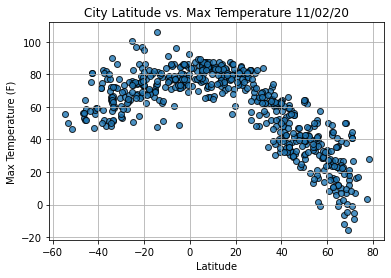

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

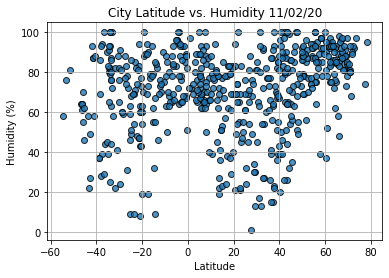

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

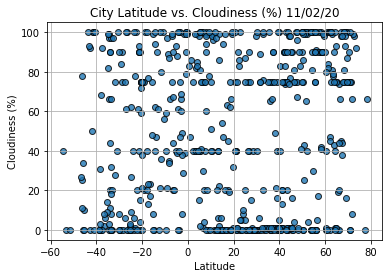

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

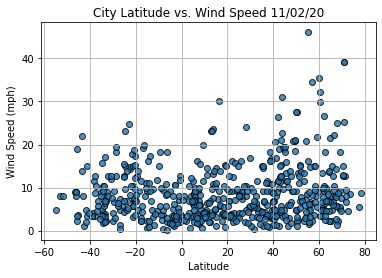

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [20]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2020-11-02 05:04:16
Lat                        -53.15
Lng                        -70.92
Max Temp                       50
Humidity                       76
Cloudiness                      0
Wind Speed                   8.05
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

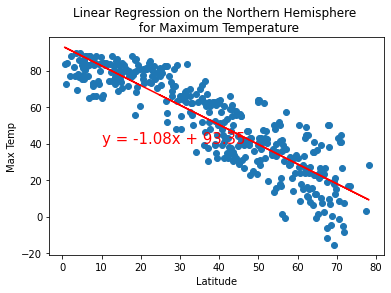

-0.8853510142966595


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

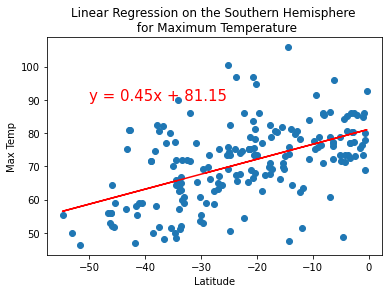

0.5218056282872378


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

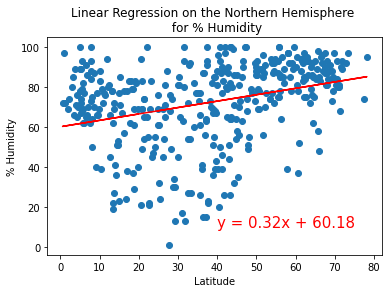

0.3182173335795584


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

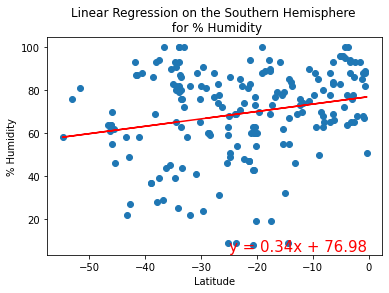

0.221564240398048


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,5))

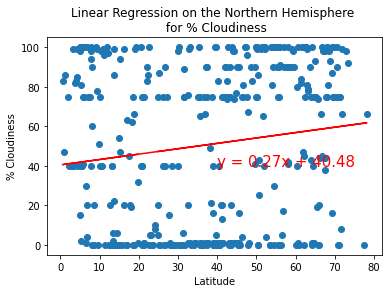

0.13902740903255467


In [26]:
# Skill Drill 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

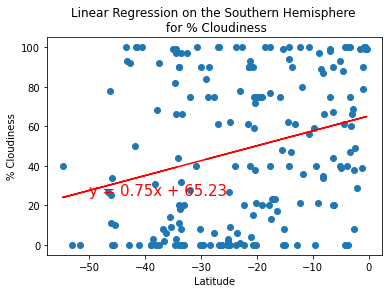

0.26842272339675555


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))

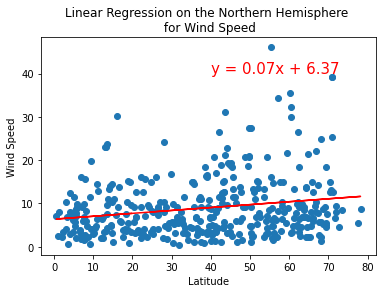

0.19977914463557989


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,40))

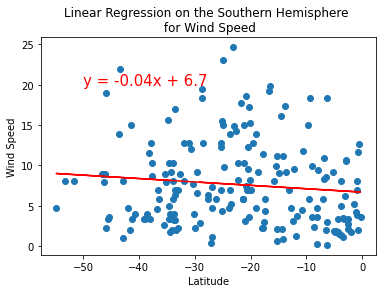

-0.10962477687374565


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))